# Question 1

The data in the file Books.dat is compiled from the catalogue of American Goverment books at Spring, 1988. It lists prices Price, number of pages P and the binding B (p - paperback, c - ) of books published by a certain publisher.

1. Find a reasonable linear model to this data using a price as the dependent variable and performing appropriate transformations of variables if necessary. 
    - Examine the goodness-of-fit of your final model and comment the results.
2. Although most of the data are for books published in 1988, in fact, two of the cloth-bound books were published in 1970's, one of the paperbacks in 1989 and another in 1984. 
    - Can you identify them? 
    - Delete them from the data and find an adequate linear model for the reduced data set. 
    - Did the omitted observations strongly affect the model?
3. Another possible way to reduce the influence of outliers is robust regression. 
    - Fit robust regression(s) and comment the results.
4. What model(s) would you introduce to a client? 
    - How would you interpret your results to him/her? (he is a complete "amateur" in statistics)
5. Estimate the price of a 200-page book for the two types of binding and give the corresponding 95% prediction intervals.

## Find a reasonable linear model to this data using a price as the dependent variable and performing appropriate transformations of variables if necessary. 
    - Examine the goodness-of-fit of your final model and comment the results.

Price,P,B
10.25,112,p
14.25,260,p
29.25,250,c
17.50,382,p
12.00,175,p
24.50,146,c


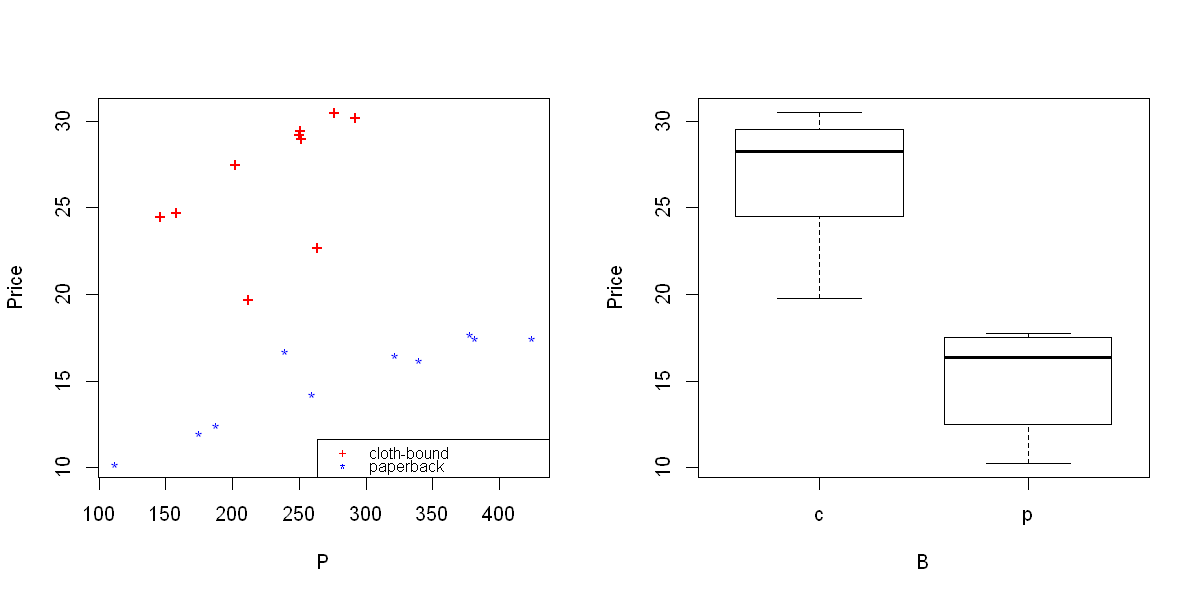

In [1]:
books = read.table("Books.dat", header = T)

books$B <- as.factor(books$B)
head(books)
# Define color for each of the 2 categories
colors <- c("Red", "Blue")
colors <- colors[books$B]

# Define shapes
shapes = c('+', '*') 
shapes <- shapes[books$B]

options(repr.plot.width=10, repr.plot.height=5)
par(mfrow = c(1,2))
plot(Price ~ P, data = books, col=colors, pch=shapes)
legend("bottomright", c("cloth-bound", "paperback"),
       col=c("Red", "Blue"), pch=c('+', '*'), cex=0.8)
plot(Price ~ B, data = books)

$$
\text{Looks like a parallel regression model will be appropriate for this data}
$$

In [2]:
lm.fit=lm(Price ~ P + B + P*B, data = books)
# summary(lm.fit)

$$
\text{The interaction is not significant, lets test if it is rellevant}
$$
$$
H_0: \beta_{P*B} = 0
$$

In [3]:
lm.fit.no.interaction=lm(Price ~ P + B, data = books)
# summary(lm.fit.no.interaction)

anova(lm.fit.no.interaction, lm.fit)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
17,100.28849,NA,NA,NA,NA
16,96.34474,1,3.943743,0.6549386,0.4302236


$$
\text{We will not reject } H_0 \text{ and conclude that the interaction may be equal to zero} 
$$
$$
\text{We will use the model without the interaction}
$$

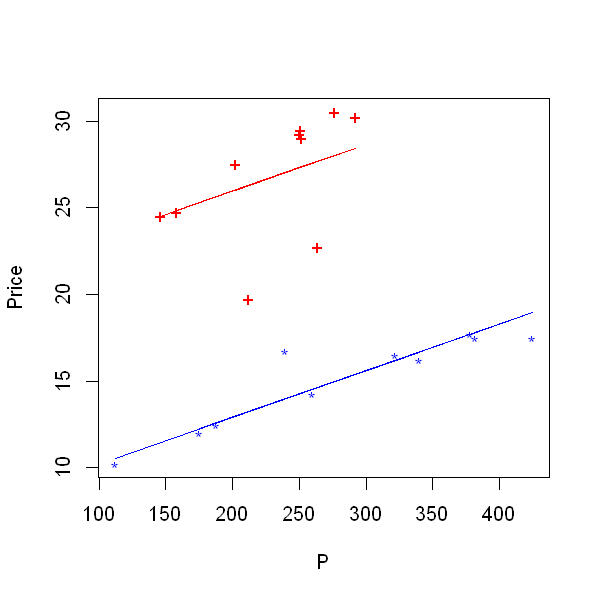

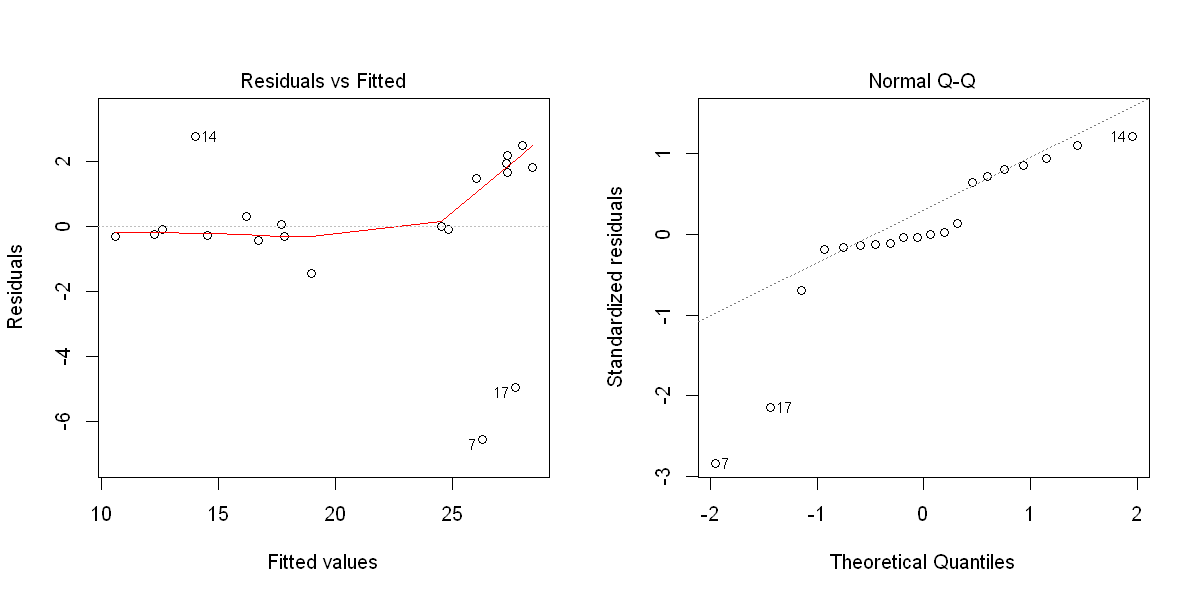

In [4]:
options(repr.plot.width=5, repr.plot.height=5)
par(mfrow = c(1,1))
plot(Price ~ P, data = books, col=colors, pch=shapes)
lines(books[books$B=='p',]$P, predict(lm.fit.no.interaction, books[books$B=='p',]), col="Blue")
lines(books[books$B=='c',]$P, predict(lm.fit.no.interaction, books[books$B=='c',]), col="Red")

options(repr.plot.width=10, repr.plot.height=5)
par(mfrow = c(1,2))
plot(lm.fit.no.interaction, which = 1:2)

$$
\text{The summary of the model looks fine, there are clearly some outliers.} 
$$
$$
\text{Looks like the residuals assumption aren't met but this data set is not big...} 
$$
$$
\text{Let's try to improve it using transformation}
$$

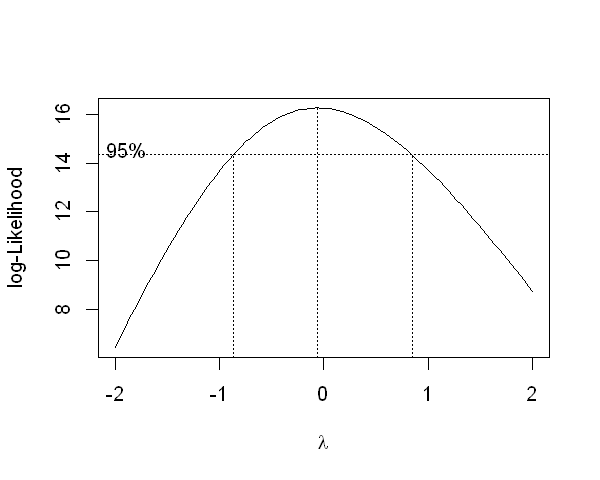

In [5]:
library(MASS)
options(repr.plot.width=5, repr.plot.height=4)
lamb = boxcox(lm.fit.no.interaction, lambda = seq(-2, 2, 1/10), plotit = TRUE, eps = 1/50, xlab = expression(lambda), ylab = "log-Likelihood")

$$
\text{Log transformation to the dependant variable may be a good transformation here} 
$$

In [6]:
lm.log.fit=lm(log(Price) ~ P + B, data = books)
# summary(lm.log.fit)

# options(repr.plot.width=10, repr.plot.height=5)
# par(mfrow = c(1,2))
# plot(lm.log.fit, which = 1:2)

$$
\text{Looks much better, also the RSS, R squared and coefficients are more significant!} 
$$
$$
\text{Lets try a log-log model.}
$$
$$
\text{First, make sure log transformation is still relevant after log transformation on P}
$$

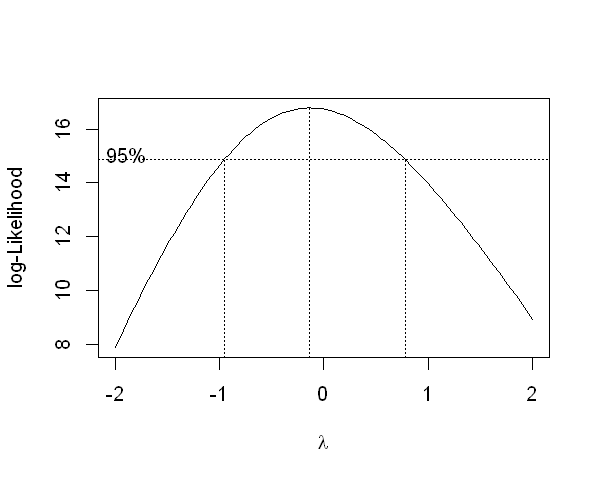

In [7]:
lm.logP.fit=lm(Price ~ log(P) + B, data = books)
# summary(lm.logP.fit)

options(repr.plot.width=5, repr.plot.height=4)
par(mfrow = c(1,1))
lamb = boxcox(lm.logP.fit, lambda = seq(-2, 2, 1/10), plotit = TRUE, eps = 1/50, xlab = expression(lambda), ylab = "log-Likelihood")

$$
\text{YES! Let's try a log-log model}
$$


Call:
lm(formula = log(Price) ~ log(P) + B, data = books)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.27165 -0.03651  0.02453  0.05926  0.15323 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.12797    0.39194   2.878   0.0104 *  
log(P)       0.39705    0.07211   5.506 3.85e-05 ***
Bp          -0.63889    0.04827 -13.237 2.21e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.105 on 17 degrees of freedom
Multiple R-squared:  0.9144,	Adjusted R-squared:  0.9044 
F-statistic: 90.82 on 2 and 17 DF,  p-value: 8.418e-10


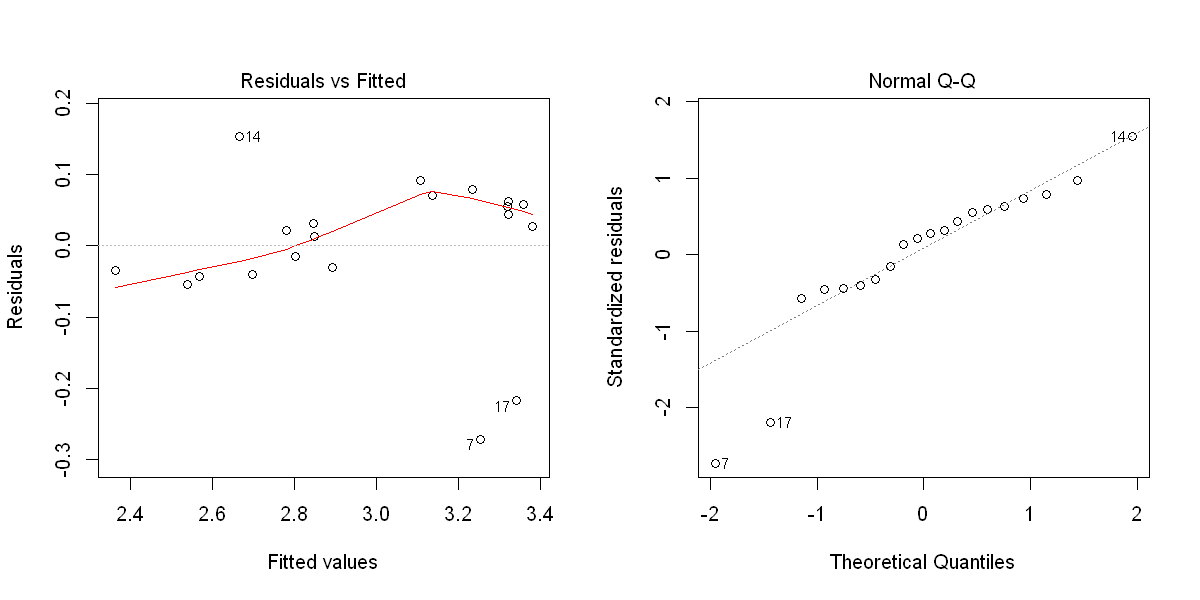

In [8]:
lm.loglog.fit=lm(log(Price) ~ log(P) + B, data = books)
summary(lm.loglog.fit)

options(repr.plot.width=10, repr.plot.height=5)
par(mfrow = c(1,2))
plot(lm.loglog.fit, which = 1:2)

$$
\text{Better in RSS and R squared, but the residuals assumptions aren't met.} 
$$
$$
\text{We have to retry it after removing the outliers}
$$

## Although most of the data are for books published in 1988, in fact, two of the cloth-bound books were published in 1970's, one of the paperbacks in 1989 and another in 1984. 
    - Can you identify them? 
    - Delete them from the data and find an adequate linear model for the reduced data set. 
    - Did the omitted observations strongly affect the model?

First, from the given data, I can't be certain which books wasn't published in 1988, but:

1. From the plot it seems like the books has a very good linear relation (with diffrent slopes for each group) between the price and the number of pages in the book except some observations.

2. Given that we know that all the books was published by the same publisher and in the same year (1988), except exactly 2 books in each group.

**I would guess that the observations that doesn't mach the linear relation (see marked with a circle) are the books that wasn't published in the same year (1988)**

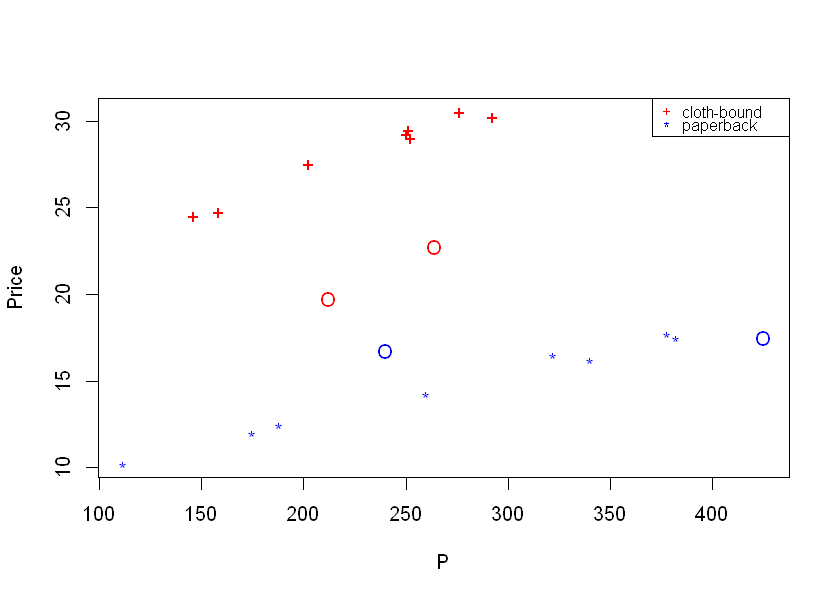

In [9]:
options(repr.plot.width=7, repr.plot.height=5)
newshapes <- shapes
newshapes[7] <- 'O'
newshapes[17] <- 'O'
newshapes[14] <- 'O'
newshapes[15] <- 'O'

plot(Price ~ P, data = books, col=colors, pch=newshapes)

legend("topright", c("cloth-bound", "paperback"),
       col=c("Red", "Blue"), pch=c('+', '*'), cex=0.8)

##### Influential observations by cook's distance:

In [10]:
cooksd <- cooks.distance(lm.loglog.fit)
sample_size <- nrow(books)

# influential row numbers
influential <- as.numeric(names(cooksd)[(cooksd > (4/sample_size))])

cat("influential: ", influential)

influential:  7 17

$$
\text{By cooks distance, observations are 7 and 17 are strongly affecting the model}
$$

In [11]:
# Removing Outliers
data_screen <- books[-c(7, 17, 14, 15), ]


# Define color for each of the 2 categories
colors <- c("Red", "Blue")
colors <- colors[data_screen$B]

# Define shapes
shapes = c('+', '*') 
shapes <- shapes[data_screen$B]


Call:
lm(formula = log(Price) ~ log(P) + B, data = data_screen)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.040530 -0.019983 -0.004761  0.018704  0.041541 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.05128    0.10662    9.86 2.12e-07 ***
log(P)       0.42256    0.01965   21.50 1.52e-11 ***
Bp          -0.71842    0.01350  -53.22  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0266 on 13 degrees of freedom
Multiple R-squared:  0.9957,	Adjusted R-squared:  0.995 
F-statistic:  1496 on 2 and 13 DF,  p-value: 4.313e-16


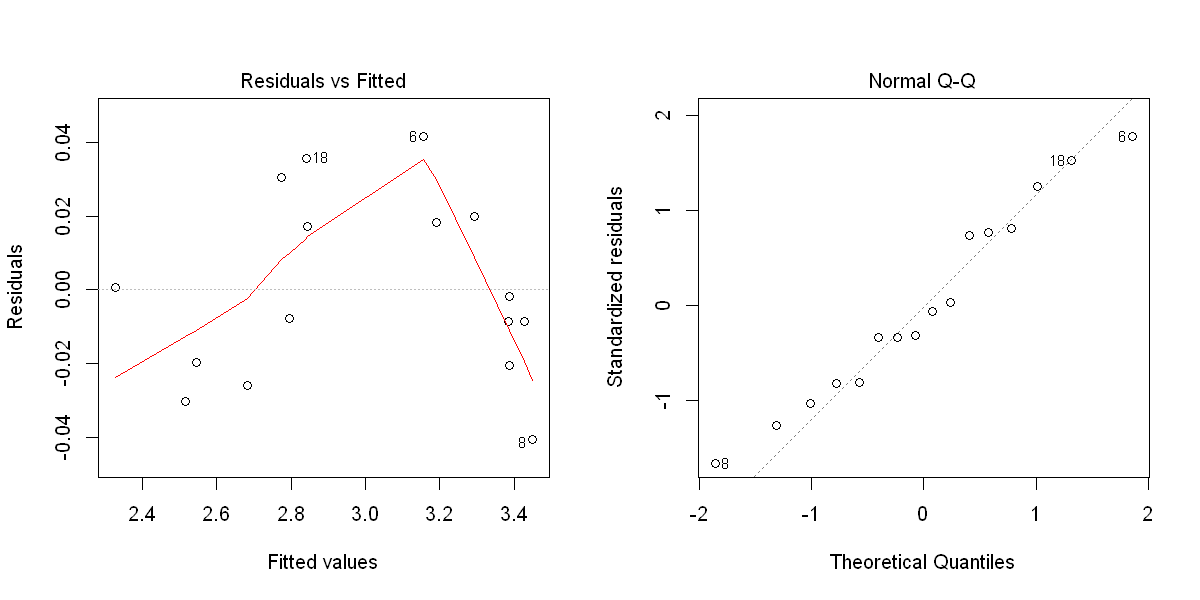

In [12]:
lm.loglog.screen.fit=lm(log(Price) ~ log(P) + B, data = data_screen)
summary(lm.loglog.screen.fit)

# options(repr.plot.width=5, repr.plot.height=5)
# par(mfrow = c(1,1))
# plot(log(Price) ~ log(P), data = data_screen, col=colors, pch=shapes)
# lines(log(data_screen[data_screen$B=='p',]$P), predict(lm.loglog.screen.fit, data_screen[data_screen$B=='p',]), col="Blue")
# lines(log(data_screen[data_screen$B=='c',]$P), predict(lm.loglog.screen.fit, data_screen[data_screen$B=='c',]), col="Red")

options(repr.plot.width=10, repr.plot.height=5)
par(mfrow = c(1,2))
plot(lm.loglog.screen.fit, which = 1:2)

$$
\text{Better now in terms of RSS and R squared}
$$
$$
\text{From the residuals plots looks like we forgot an explanatory variable.}
$$

$$
\text{Let's try to add the interaction back after removing the outliers}
$$


Call:
lm(formula = log(Price) ~ log(P) + B + log(P) * B, data = data_screen)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.027044 -0.013326  0.002866  0.011150  0.025456 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.53956    0.14557  10.576 1.95e-07 ***
log(P)       0.33219    0.02691  12.343 3.53e-08 ***
Bp          -1.37786    0.16972  -8.118 3.23e-06 ***
log(P):Bp    0.12137    0.03119   3.891  0.00214 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01841 on 12 degrees of freedom
Multiple R-squared:  0.9981,	Adjusted R-squared:  0.9976 
F-statistic:  2087 on 3 and 12 DF,  p-value: < 2.2e-16


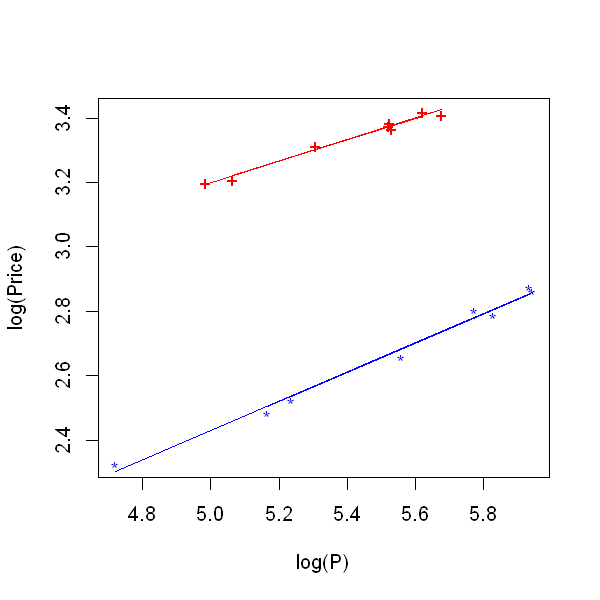

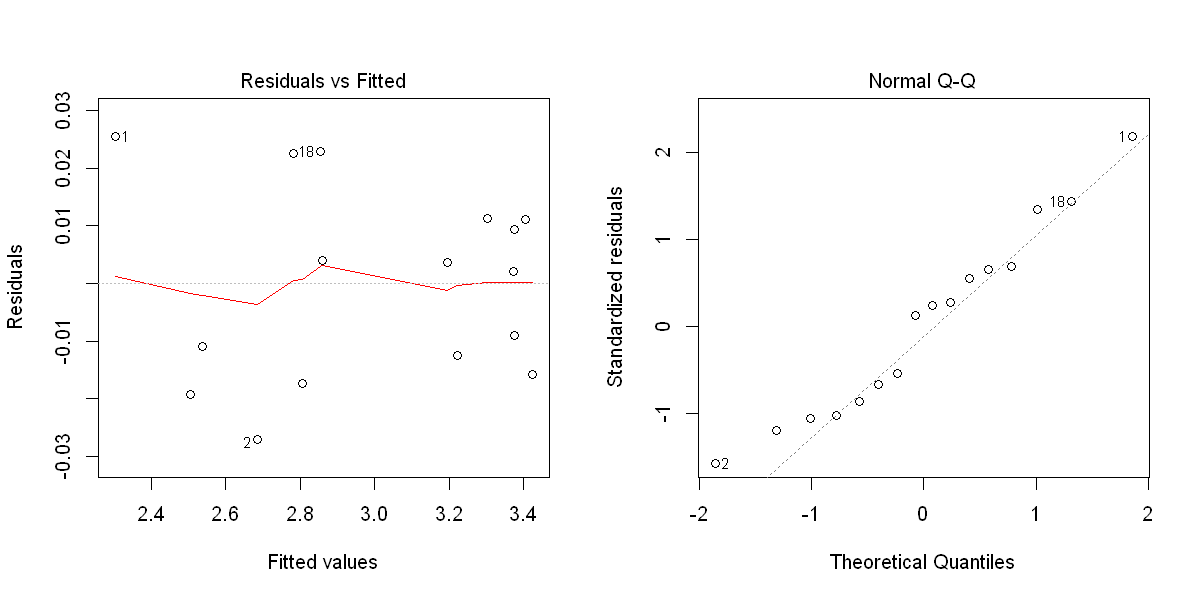

In [13]:
lm.loglog.screen.full.fit=lm(log(Price) ~ log(P) + B + log(P) * B, data = data_screen)
summary(lm.loglog.screen.full.fit)

options(repr.plot.width=5, repr.plot.height=5)
par(mfrow = c(1,1))
plot(log(Price) ~ log(P), data = data_screen, col=colors, pch=shapes)
lines(log(data_screen[data_screen$B=='p',]$P), predict(lm.loglog.screen.full.fit, data_screen[data_screen$B=='p',]), col="Blue")
lines(log(data_screen[data_screen$B=='c',]$P), predict(lm.loglog.screen.full.fit, data_screen[data_screen$B=='c',]), col="Red")

options(repr.plot.width=10, repr.plot.height=5)
par(mfrow = c(1,2))
plot(lm.loglog.screen.full.fit, which = 1:2)

$$
\text{The residuals assumptions are much better now, and the interaction coefficient is significant! } 
$$
$$
\text{Let's compare the final models}
$$

In [14]:
crossVal <- function(lm.object)
{
    # Computes the cross-validation (CV), the generalized cross-validation (GCV) and the cross-validation correlation coefficient (R^2_{CV}) for the specified linear model
    res <- lm.object$residuals
    y <- lm.object$fitted.values + lm.object$residuals
    h <- lm.influence(lm.object)$hat
    n <- length(y)
    cv <- mean(res^2/(1 - h)^2)
    gcv <- (n * sum(res^2))/lm.object$df^2
    r2cv <- cor(y, y - res/(1 - h))^2
    return(cbind(cv, gcv, r2cv))
}

In [15]:
lm.loglog.screen.full.fit.crossVal <- crossVal(lm.loglog.screen.full.fit)
lm.loglog.screen.fit.crossVal <- crossVal(lm.loglog.screen.fit)
models <- c("full log log model", "log log model")

results <- cbind(models,
                 rbind(lm.loglog.screen.full.fit.crossVal, lm.loglog.screen.fit.crossVal))
results

models,cv,gcv,r2cv
full log log model,0.000591486576133862,0.000451903435589474,0.99574477928641
log log model,0.000864445412911331,0.000870942028517718,0.993499122250704


$$
\text{Both models are almost the same, but the full log log model meets the residuals assumption much better} 
$$

$$
\text{SUMMARY} 
$$
$$
\text{The full log log model is the choosen model for this data}
$$

## Another possible way to reduce the influence of outliers is robust regression. 
    - Fit robust regression(s) and comment the results.

In [16]:
mod.huber <- rlm(Price ~ P + B + P * B, data = books, psi = psi.huber)
mod.hampel <- rlm(Price ~ P + B + P * B, data = books, psi = psi.hampel)
mod.tukey <- rlm(Price ~ P + B + P * B, data = books, psi = psi.bisquare)
mod.lms <- lqs(Price ~ P + B + P * B, data = books, method = "lms")
mod.lts <- lqs(Price ~ P + B + P * B, data = books, method = "lts")

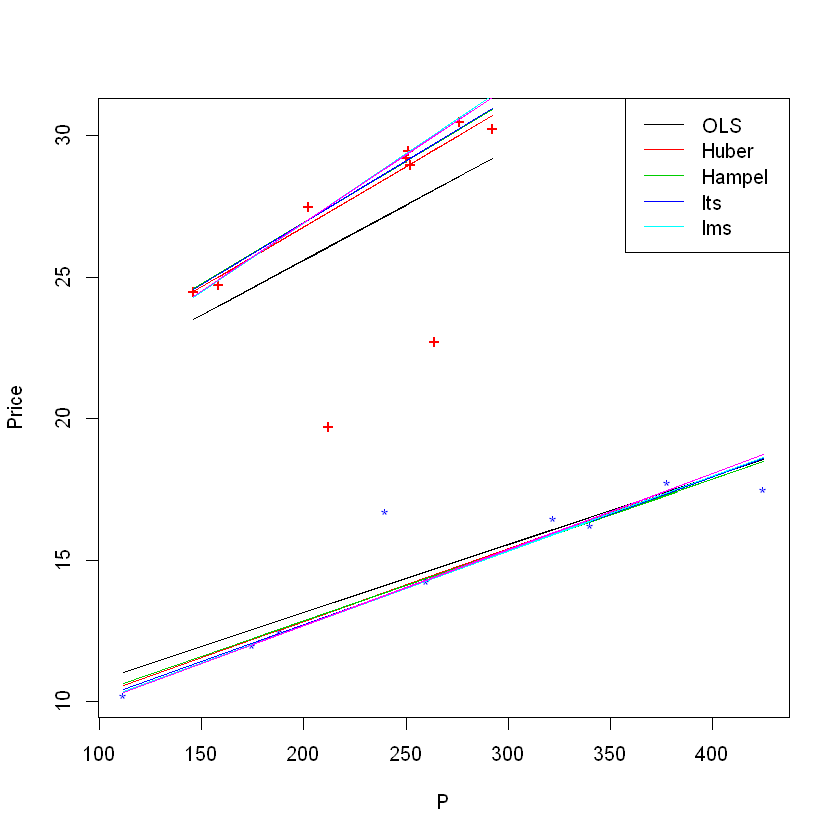

In [17]:
colors <- c("Red", "Blue")
colors <- colors[books$B]
shapes = c('+', '*') 
shapes <- shapes[books$B]
options(repr.plot.width=7, repr.plot.height=7)
par(mfrow = c(1,1))
plot(Price ~ P, data = books, col=colors, pch=shapes)
lines(books[books$B=='p',]$P, predict(lm.fit, books[books$B=='p',]), col=1)
lines(books[books$B=='c',]$P, predict(lm.fit, books[books$B=='c',]), col=1)

lines(books[books$B=='p',]$P, predict(mod.huber, books[books$B=='p',]), col=2)
lines(books[books$B=='c',]$P, predict(mod.huber, books[books$B=='c',]), col=2)

lines(books[books$B=='p',]$P, predict(mod.hampel, books[books$B=='p',]), col=3)
lines(books[books$B=='c',]$P, predict(mod.hampel, books[books$B=='c',]), col=3)

lines(books[books$B=='p',]$P, predict(mod.tukey, books[books$B=='p',]), col=4)
lines(books[books$B=='c',]$P, predict(mod.tukey, books[books$B=='c',]), col=4)

lines(books[books$B=='p',]$P, predict(mod.lms, books[books$B=='p',]), col=5)
lines(books[books$B=='c',]$P, predict(mod.lms, books[books$B=='c',]), col=5)

lines(books[books$B=='p',]$P, predict(mod.lts, books[books$B=='p',]), col=6)
lines(books[books$B=='c',]$P, predict(mod.lts, books[books$B=='c',]), col=6)

legend(x="topright", legend = c("OLS", "Huber", "Hampel", "lts", "lms"), col=1:6, lty=1)

$$
\text{Let's compare the models using leave one out CV}
$$

In [18]:
none <- function(x){ return (x)}

lpo <- function(p = 1, un.trans = none, data = books, fit.func, ...){
    # A general "leave p out" CV calculation funcion
    n = nrow(data)
    pred = rep(0, n)
    step = p
    for(i in seq(1,n, by = step)){
        fit <- fit.func(..., data = data[-(i:(i+p-1)), ])
        pred[(i:(i+p-1))] <- un.trans(predict(fit, data[(i:(i+p-1)),-1]))
    }
    press <- sum((data[,1] - pred)^2)
    cv = round(press/n, digits = 5)
    
    return(cv)
}

In [19]:
mod.huber.cv <- lpo(fit.func = rlm, formula = Price ~ P + B + P * B, psi = psi.huber)
mod.hampel.cv <- lpo(fit.func = rlm, formula = Price ~ P + B + P * B, psi = psi.hampel)
mod.tukey.cv <- lpo(fit.func = rlm, formula = Price ~ P + B + P * B, psi = psi.bisquare)
mod.lms.cv <- lpo(fit.func = lqs, formula = Price ~ P + B + P * B, method = "lms")
mod.lts.cv <- lpo(fit.func = lqs, formula = Price ~ P + B + P * B, method = "lts")

# Note that I'm using un.trans to go back to the original scale
mod.loglog.cv <- lpo(un.trans = exp, fit.func = lm, formula = log(Price) ~ log(P) + B + log(P) * B)


models <- c("full log log model", 
            "Huber",
            "Hampel",
            "Tukey",
            "lms",
            "lts"
           )
cv.original.scale <- rbind(mod.loglog.cv,
                       mod.huber.cv,
                       mod.hampel.cv,
                       mod.tukey.cv,
                       mod.lms.cv,
                       mod.lts.cv
                      )

results <- cbind(models, cv.original.scale)

colnames(results) <- c("Model", "CV on original scale")

results

Warning message in rlm.default(x, y, weights, method = method, wt.method = wt.method, :
"'rlm' failed to converge in 20 steps"Warning message in rlm.default(x, y, weights, method = method, wt.method = wt.method, :
"'rlm' failed to converge in 20 steps"Warning message in rlm.default(x, y, weights, method = method, wt.method = wt.method, :
"'rlm' failed to converge in 20 steps"Warning message in rlm.default(x, y, weights, method = method, wt.method = wt.method, :
"'rlm' failed to converge in 20 steps"

,Model,CV on original scale
mod.loglog.cv,full log log model,6.72315
mod.huber.cv,Huber,6.02833
mod.hampel.cv,Hampel,6.09954
mod.tukey.cv,Tukey,6.09151
mod.lms.cv,lms,6.34038
mod.lts.cv,lts,6.33307


$$
\text{What about the model without the outliers?}
$$

In [20]:
mod.loglog.screen.cv <- lpo(data = data_screen, un.trans = exp, fit.func = lm, 
                                 formula = log(Price) ~ log(P) + B + log(P) * B)

cat("cv: ", mod.loglog.screen.cv)

cv:  0.16211

$$
\text{Looks better than the robust models, but this cross validation didn't included the omited observations!} 
$$
$$
\text{Let's add the mean prediction error to model's cv (for a fair comparision)}
$$

In [21]:
outliers = c(7,17,14,15)
outliers.mean.error = round(
    mean((books[outliers,1] - exp(predict(lm.loglog.screen.full.fit, books[outliers,-1])))^2)
                          , digits = 5)

mod.loglog.screen.cv = (mod.loglog.screen.cv + outliers.mean.error)/2
cat("cv: ", mod.loglog.screen.cv)

cv:  14.86557

$$
\text{Now we can see that the model without the outliers has a significant error} 
$$
$$
\text{(compared to the robust regression models) when trying to predict the outliers}
$$
$$
\text{This model is higly overfitted to the screend data}
$$

## What model(s) would you introduce to a client? 
    - How would you interpret your results to him/her? (he is a complete "amateur" in statistics)

$$
\text{Ill present the Huber model to the client} 
$$
$$
\text{since it has the best percision and it is robust for observations with big measurment errors} 
$$

$$
\text{Client interpertation:} 
$$
$$
\text{We have a great model for predicting book price given its pages count and binding.} 
$$
$$
\text{The model is very accurate and is not biased by mistakes in the data.}
$$

## Estimate the price of a 200-page book for the two types of binding and give the corresponding 95% prediction intervals.

In [23]:
data <- data.frame(books[1:2,-1])
data$P <- 200
data$B <- c('p', 'c')

prediction.intervals <- predict(mod.huber, data, interval = "prediction")
# prediction.intervals

cat("For paperback bindind, the price estimation is: ", prediction.intervals[1,1], 
    ". CI=(",prediction.intervals[1,2:3],")\n")

cat("For cloth bindind, the price estimation is: ", prediction.intervals[2,1], 
    ". CI=(",prediction.intervals[2,2:3],")\n")

Warning message in predict.lm(mod.huber, data, interval = "prediction", scale = 0.514481283876248):
"Assuming constant prediction variance even though model fit is weighted
"

For paperback bindind, the price estimation is:  12.84051 . CI=( 11.74964 13.93138 )
For cloth bindind, the price estimation is:  26.77525 . CI=( 25.6976 27.8529 )
